In [1]:
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import pylab as pl
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import preprocessing
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import plot_confusion_matrix

from sklearn import datasets
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

In [2]:
arr2= np.load('data_array_formatted.npy', allow_pickle= True)
X= arr2[:,0:-1]
Y= arr2[:,-1]


### Split arrays or matrices into random train and test subsets - 20% for Test, 80% to train
X_train, X_test, y_train, y_test= train_test_split(X, Y, test_size=0.20,  random_state = 200)

print(X_train,y_train)
print(len(X_train),len(y_train),len(X_test),len(y_test))

[[0.000210523684764536 0.005160091115494809 0.1361031518624642 ... 0 0 0]
 [0.06578947122576177 0.013897588526412541 0.14469914040114612 ... 0 0 0]
 [0.005263155277008304 0.010694145453587434 0.11891117478510028 ... 0 1 0]
 ...
 [0.05263157645429362 0.859810398981424 0.1346704871060172 ... 0 0 0]
 [0.000988368423653601 0.005792679656356735 0.1017191977077364 ... 1 0 0]
 [0.17105262939750693 0.057828596847734885 0.13753581661891118 ... 0 0 0]] ['Bad' 'Bad' 'Bad' ... 'Average' 'Bad' 'Average']
4800 4800 1200 1200


# Decision Tree

Best parameters set found on development set:
 {'max_leaf_nodes': 75, 'min_samples_split': 15}

 Best Score 0.6556584259589338

 Grid scores on development set:
0.573 (+/-0.017) for {'max_leaf_nodes': 5, 'min_samples_split': 5}
0.573 (+/-0.017) for {'max_leaf_nodes': 5, 'min_samples_split': 10}
0.573 (+/-0.017) for {'max_leaf_nodes': 5, 'min_samples_split': 15}
0.573 (+/-0.017) for {'max_leaf_nodes': 5, 'min_samples_split': 20}
0.573 (+/-0.017) for {'max_leaf_nodes': 5, 'min_samples_split': 25}
0.573 (+/-0.017) for {'max_leaf_nodes': 5, 'min_samples_split': 30}
0.573 (+/-0.017) for {'max_leaf_nodes': 5, 'min_samples_split': 35}
0.573 (+/-0.017) for {'max_leaf_nodes': 5, 'min_samples_split': 40}
0.573 (+/-0.017) for {'max_leaf_nodes': 5, 'min_samples_split': 45}
0.573 (+/-0.017) for {'max_leaf_nodes': 5, 'min_samples_split': 50}
0.573 (+/-0.017) for {'max_leaf_nodes': 5, 'min_samples_split': 55}
0.573 (+/-0.017) for {'max_leaf_nodes': 5, 'min_samples_split': 60}
0.573 (+/-0.017) for {'m

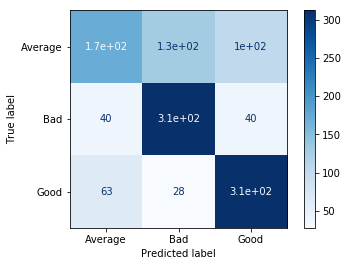

In [3]:
from sklearn.tree import DecisionTreeClassifier #import the DT classifier


tuned_parameters = [{'min_samples_split': [i for i in range(5,80,5)], 'max_leaf_nodes':  [k for k in range(5,80,5)]}]

clf = GridSearchCV(DecisionTreeClassifier(), tuned_parameters, scoring='f1_macro')
clf.fit(X_train, y_train)

#Evaluation

print("Best parameters set found on development set:\n", clf.best_params_)
print("\n Best Score", clf.best_score_) 

print("\n Grid scores on development set:")
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std, params))

print("Detailed classification report:")
print("The scores are computed on the full evaluation set. \n")
y_true, y_pred = y_test, clf.predict(X_test)
print(classification_report(y_true, y_pred))

#Lets print confision matrix
labels =['Average','Bad','Good']
disp = plot_confusion_matrix(clf, X_test, y_test,
                                 display_labels=labels,
                                 cmap=plt.cm.Blues)

print ('\nTesting score: ',clf.score (X_test, y_test)) # print the testing score(accuracy)
print ('\nTraining Score: ',clf.score (X_train, y_train)) # print the trainig score(accuracy)

In [4]:
#Cross Validate
from sklearn.model_selection import cross_validate
from sklearn.metrics import recall_score

scoring = ['f1_macro']
scores = cross_validate(clf, X, Y, cv=5, scoring=scoring)
print(sorted(scores.keys()))
print('test_f1_macro', scores['test_f1_macro'])

['fit_time', 'score_time', 'test_f1_macro']
test_f1_macro [0.67301156 0.64697786 0.68916779 0.6531067  0.64880657]


### K best Data

In [5]:
#Load Kbest data
arr2= np.load('data_kBest.npy', allow_pickle= True)
X= arr2[:,0:-1]
Y= arr2[:,-1]


### Split arrays or matrices into random train and test subsets - 20% for Test, 80% to train
X_train, X_test, y_train, y_test= train_test_split(X, Y, test_size=0.20,  random_state = 200)

print(X_train,y_train)
print(len(X_train),len(y_train),len(X_test),len(y_test))

[[1 0 0 0 0]
 [0 1 0 0 0]
 [0 0 0 0 1]
 ...
 [1 0 0 0 0]
 [0 0 0 1 0]
 [1 0 0 0 0]] ['Bad' 'Bad' 'Bad' ... 'Average' 'Bad' 'Average']
4800 4800 1200 1200


Best parameters set found on development set:
 {'max_leaf_nodes': 5, 'min_samples_split': 5}

 Best Score 0.48374355403164804

 Grid scores on development set:
0.484 (+/-0.017) for {'max_leaf_nodes': 5, 'min_samples_split': 5}
0.484 (+/-0.017) for {'max_leaf_nodes': 5, 'min_samples_split': 10}
0.484 (+/-0.017) for {'max_leaf_nodes': 5, 'min_samples_split': 15}
0.484 (+/-0.017) for {'max_leaf_nodes': 5, 'min_samples_split': 20}
0.484 (+/-0.017) for {'max_leaf_nodes': 5, 'min_samples_split': 25}
0.484 (+/-0.017) for {'max_leaf_nodes': 5, 'min_samples_split': 30}
0.484 (+/-0.017) for {'max_leaf_nodes': 5, 'min_samples_split': 35}
0.484 (+/-0.017) for {'max_leaf_nodes': 5, 'min_samples_split': 40}
0.484 (+/-0.017) for {'max_leaf_nodes': 5, 'min_samples_split': 45}
0.484 (+/-0.017) for {'max_leaf_nodes': 5, 'min_samples_split': 50}
0.484 (+/-0.017) for {'max_leaf_nodes': 5, 'min_samples_split': 55}
0.484 (+/-0.017) for {'max_leaf_nodes': 5, 'min_samples_split': 60}
0.484 (+/-0.017) for {'ma

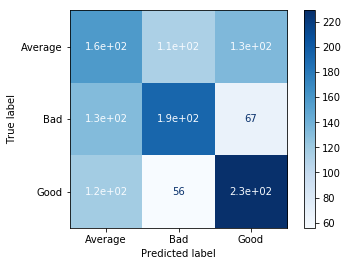

In [6]:
from sklearn.tree import DecisionTreeClassifier #import the DT classifier


tuned_parameters = [{'min_samples_split': [i for i in range(5,80,5)], 'max_leaf_nodes':  [k for k in range(5,80,5)]}]

clf = GridSearchCV(DecisionTreeClassifier(), tuned_parameters, scoring='f1_macro')
clf.fit(X_train, y_train)

#Evaluation

print("Best parameters set found on development set:\n", clf.best_params_)
print("\n Best Score", clf.best_score_) 

print("\n Grid scores on development set:")
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std, params))

print("Detailed classification report:")
print("The scores are computed on the full evaluation set. \n")
y_true, y_pred = y_test, clf.predict(X_test)
print(classification_report(y_true, y_pred))

#Lets print confision matrix
labels =['Average','Bad','Good']
disp = plot_confusion_matrix(clf, X_test, y_test,
                                 display_labels=labels,
                                 cmap=plt.cm.Blues)

print ('\nTesting score: ',clf.score (X_test, y_test)) # print the testing score(accuracy)
print ('\nTraining Score: ',clf.score (X_train, y_train)) # print the trainig score(accuracy)

In [7]:
#Cross Validate
from sklearn.model_selection import cross_validate
from sklearn.metrics import recall_score

scoring = ['f1_macro']
scores = cross_validate(clf, X, Y, cv=5, scoring=scoring)
print(sorted(scores.keys()))
print('test_f1_macro', scores['test_f1_macro'])

['fit_time', 'score_time', 'test_f1_macro']
test_f1_macro [0.48835152 0.48004522 0.48040023 0.47720038 0.49125204]


### K select Percentile

In [8]:
#Load Kbest data
arr2= np.load('data_select_percentile.npy', allow_pickle= True)
X= arr2[:,0:-1]
Y= arr2[:,-1]


### Split arrays or matrices into random train and test subsets - 20% for Test, 80% to train
X_train, X_test, y_train, y_test= train_test_split(X, Y, test_size=0.20,  random_state = 200)

print(X_train,y_train)
print(len(X_train),len(y_train),len(X_test),len(y_test))

[[0.000210523684764536 0.005160091115494809 0.1361031518624642 0 0]
 [0.06578947122576177 0.013897588526412541 0.14469914040114612 0 0]
 [0.005263155277008304 0.010694145453587434 0.11891117478510028 0 1]
 ...
 [0.05263157645429362 0.859810398981424 0.1346704871060172 0 0]
 [0.000988368423653601 0.005792679656356735 0.1017191977077364 1 0]
 [0.17105262939750693 0.057828596847734885 0.13753581661891118 0 0]] ['Bad' 'Bad' 'Bad' ... 'Average' 'Bad' 'Average']
4800 4800 1200 1200


Best parameters set found on development set:
 {'max_leaf_nodes': 75, 'min_samples_split': 5}

 Best Score 0.6569560235513199

 Grid scores on development set:
0.573 (+/-0.017) for {'max_leaf_nodes': 5, 'min_samples_split': 5}
0.573 (+/-0.017) for {'max_leaf_nodes': 5, 'min_samples_split': 10}
0.573 (+/-0.017) for {'max_leaf_nodes': 5, 'min_samples_split': 15}
0.573 (+/-0.017) for {'max_leaf_nodes': 5, 'min_samples_split': 20}
0.573 (+/-0.017) for {'max_leaf_nodes': 5, 'min_samples_split': 25}
0.573 (+/-0.017) for {'max_leaf_nodes': 5, 'min_samples_split': 30}
0.573 (+/-0.017) for {'max_leaf_nodes': 5, 'min_samples_split': 35}
0.573 (+/-0.017) for {'max_leaf_nodes': 5, 'min_samples_split': 40}
0.573 (+/-0.017) for {'max_leaf_nodes': 5, 'min_samples_split': 45}
0.573 (+/-0.017) for {'max_leaf_nodes': 5, 'min_samples_split': 50}
0.573 (+/-0.017) for {'max_leaf_nodes': 5, 'min_samples_split': 55}
0.573 (+/-0.017) for {'max_leaf_nodes': 5, 'min_samples_split': 60}
0.573 (+/-0.017) for {'ma

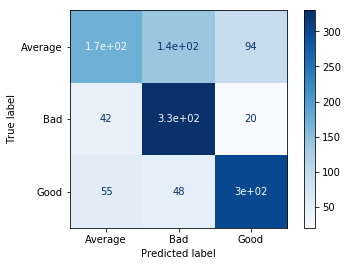

In [9]:
from sklearn.tree import DecisionTreeClassifier #import the DT classifier


tuned_parameters = [{'min_samples_split': [i for i in range(5,80,5)], 'max_leaf_nodes':  [k for k in range(5,80,5)]}]

clf = GridSearchCV(DecisionTreeClassifier(), tuned_parameters, scoring='f1_macro')
clf.fit(X_train, y_train)

#Evaluation

print("Best parameters set found on development set:\n", clf.best_params_)
print("\n Best Score", clf.best_score_) 

print("\n Grid scores on development set:")
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std, params))

print("Detailed classification report:")
print("The scores are computed on the full evaluation set. \n")
y_true, y_pred = y_test, clf.predict(X_test)
print(classification_report(y_true, y_pred))

#Lets print confision matrix
labels =['Average','Bad','Good']
disp = plot_confusion_matrix(clf, X_test, y_test,
                                 display_labels=labels,
                                 cmap=plt.cm.Blues)

print ('\nTesting score: ',clf.score (X_test, y_test)) # print the testing score(accuracy)
print ('\nTraining Score: ',clf.score (X_train, y_train)) # print the trainig score(accuracy)

In [10]:
#Cross Validate
from sklearn.model_selection import cross_validate
from sklearn.metrics import recall_score

scoring = ['f1_macro']
scores = cross_validate(clf, X, Y, cv=5, scoring=scoring)
print(sorted(scores.keys()))
print('test_f1_macro', scores['test_f1_macro'])

['fit_time', 'score_time', 'test_f1_macro']
test_f1_macro [0.66255799 0.63870183 0.66632259 0.66598179 0.65546311]


### PCA

In [11]:
#Load Kbest data
arr2= np.load('data_pca.npy', allow_pickle= True)
X= arr2[:,0:-1]
Y= arr2[:,-1]


### Split arrays or matrices into random train and test subsets - 20% for Test, 80% to train
X_train, X_test, y_train, y_test= train_test_split(X, Y, test_size=0.20,  random_state = 200)

print(X_train,y_train)
print(len(X_train),len(y_train),len(X_test),len(y_test))

[[-0.45579826472607415 0.7046019793738675 -0.28825772682504214
  -0.10797909629417606]
 [-0.45821755567357747 -0.7059423617884181 -0.2916635351593642
  -0.09416709513907746]
 [-0.21141491550725078 -0.0031579275616275076 0.8725130077194068
  -0.3905247495057231]
 ...
 [-0.4581169085501422 0.717465384690377 -0.2917362036100829
  -0.07432632961038373]
 [0.751538661872047 -0.0025887537747943763 -0.10000450010468652
  -0.05167456137188623]
 [-0.4595648294413432 0.7112979984399956 -0.2918739685292939
  -0.09370938251503302]] ['Bad' 'Bad' 'Bad' ... 'Average' 'Bad' 'Average']
4800 4800 1200 1200


Best parameters set found on development set:
 {'max_leaf_nodes': 75, 'min_samples_split': 50}

 Best Score 0.6279386271751993

 Grid scores on development set:
0.505 (+/-0.017) for {'max_leaf_nodes': 5, 'min_samples_split': 5}
0.505 (+/-0.017) for {'max_leaf_nodes': 5, 'min_samples_split': 10}
0.505 (+/-0.017) for {'max_leaf_nodes': 5, 'min_samples_split': 15}
0.505 (+/-0.017) for {'max_leaf_nodes': 5, 'min_samples_split': 20}
0.505 (+/-0.017) for {'max_leaf_nodes': 5, 'min_samples_split': 25}
0.505 (+/-0.017) for {'max_leaf_nodes': 5, 'min_samples_split': 30}
0.505 (+/-0.017) for {'max_leaf_nodes': 5, 'min_samples_split': 35}
0.505 (+/-0.017) for {'max_leaf_nodes': 5, 'min_samples_split': 40}
0.505 (+/-0.017) for {'max_leaf_nodes': 5, 'min_samples_split': 45}
0.505 (+/-0.017) for {'max_leaf_nodes': 5, 'min_samples_split': 50}
0.505 (+/-0.017) for {'max_leaf_nodes': 5, 'min_samples_split': 55}
0.505 (+/-0.017) for {'max_leaf_nodes': 5, 'min_samples_split': 60}
0.505 (+/-0.017) for {'m

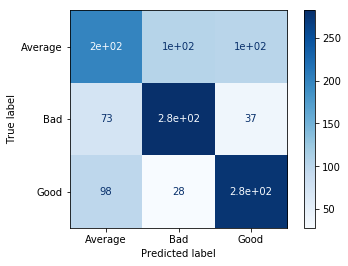

In [12]:
from sklearn.tree import DecisionTreeClassifier #import the DT classifier


tuned_parameters = [{'min_samples_split': [i for i in range(5,80,5)], 'max_leaf_nodes':  [k for k in range(5,80,5)]}]

clf = GridSearchCV(DecisionTreeClassifier(), tuned_parameters, scoring='f1_macro')
clf.fit(X_train, y_train)

#Evaluation

print("Best parameters set found on development set:\n", clf.best_params_)
print("\n Best Score", clf.best_score_) 

print("\n Grid scores on development set:")
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std, params))

print("Detailed classification report:")
print("The scores are computed on the full evaluation set. \n")
y_true, y_pred = y_test, clf.predict(X_test)
print(classification_report(y_true, y_pred))

#Lets print confision matrix
labels =['Average','Bad','Good']
disp = plot_confusion_matrix(clf, X_test, y_test,
                                 display_labels=labels,
                                 cmap=plt.cm.Blues)

print ('\nTesting score: ',clf.score (X_test, y_test)) # print the testing score(accuracy)
print ('\nTraining Score: ',clf.score (X_train, y_train)) # print the trainig score(accuracy)

In [13]:
#Cross Validate
from sklearn.model_selection import cross_validate
from sklearn.metrics import recall_score

scoring = ['f1_macro']
scores = cross_validate(clf, X, Y, cv=5, scoring=scoring)
print(sorted(scores.keys()))
print('test_f1_macro', scores['test_f1_macro'])

['fit_time', 'score_time', 'test_f1_macro']
test_f1_macro [0.64288298 0.62795548 0.60794237 0.6412017  0.63505839]
